In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv(r'C:\Users\prabh\OneDrive\Desktop\EV_Data.csv')
df.head()

,Age,City,Profession,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Political Background,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Dehradun,Political Background,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Political Background,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Haldwani,Business,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Political Background,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [3]:
df.isnull().sum()

Age                                                                     0
City                                                                    0
Profession                                                              0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of EV would you prefer?                          0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV                                             0
Do you think Electronic vehicles will replace fuel cars in India?       0
dtype: int64

In [4]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,31.739000,4.118000,2.258342e+06,3.349000
std,11.111001,1.469774,9.993558e+05,0.887686
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.782116e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.753170e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [5]:
df.shape

(1000, 13)

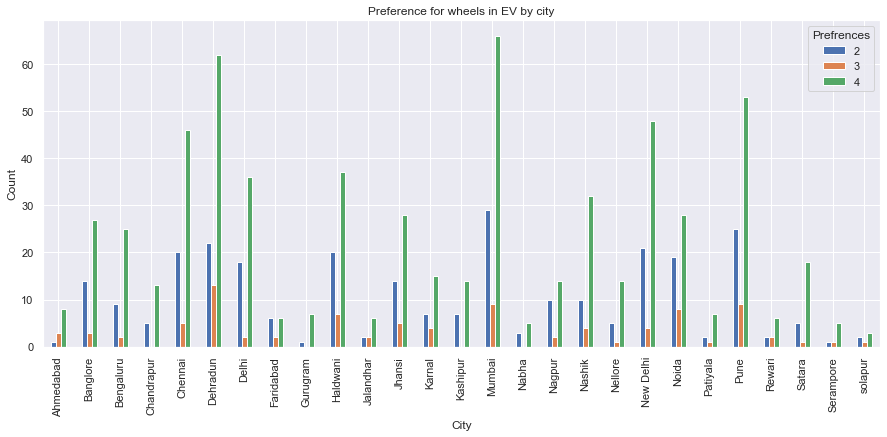

In [6]:
from matplotlib.pylab import rcParams
df = pd.DataFrame(df)
grouped = df.groupby(['City','Preference for wheels in EV']).size().unstack()
rcParams['figure.figsize'] = 15, 6
grouped.plot(kind = 'bar')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Preference for wheels in EV by city')
plt.legend(title = 'Prefrences')
plt.show()

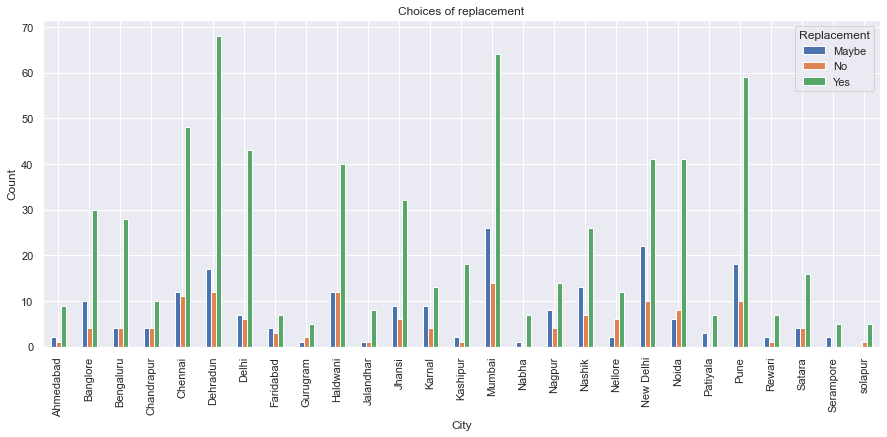

In [7]:
grouped_prefer_replacing = df.groupby(['City','Would you prefer replacing all your vehicles to Electronic vehicles?'
                                      ]).size().unstack()
grouped_prefer_replacing.plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Choices of replacement')
plt.legend(title = 'Replacement')
plt.show()

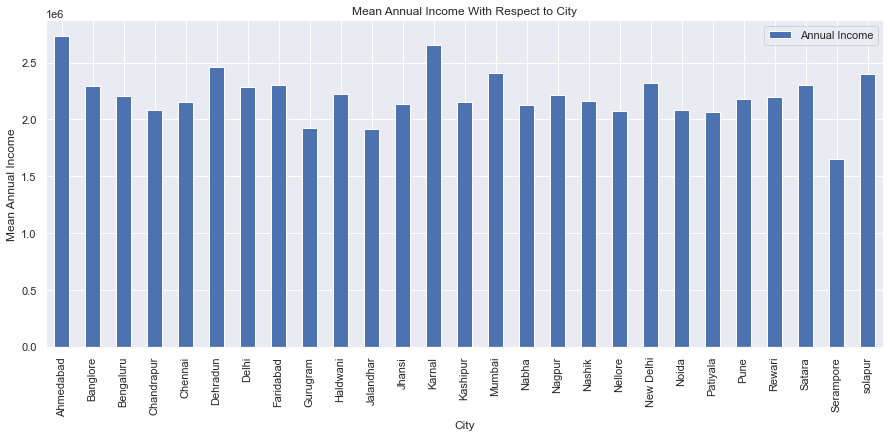

In [8]:
grouped_annualIncome = df.groupby('City')['Annual Income'].mean()
grouped_annualIncome.plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('Mean Annual Income')
plt.title('Mean Annual Income With Respect to City')
plt.legend()
plt.show()

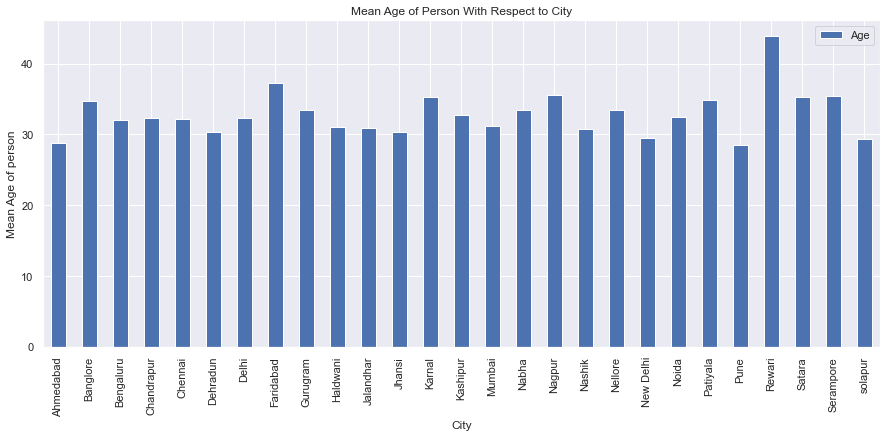

In [9]:
grouped_age_income = df.groupby('City')['Age'].mean()
grouped_age_income.plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('Mean Age of person')
plt.title('Mean Age of Person With Respect to City')
plt.legend()
plt.show()

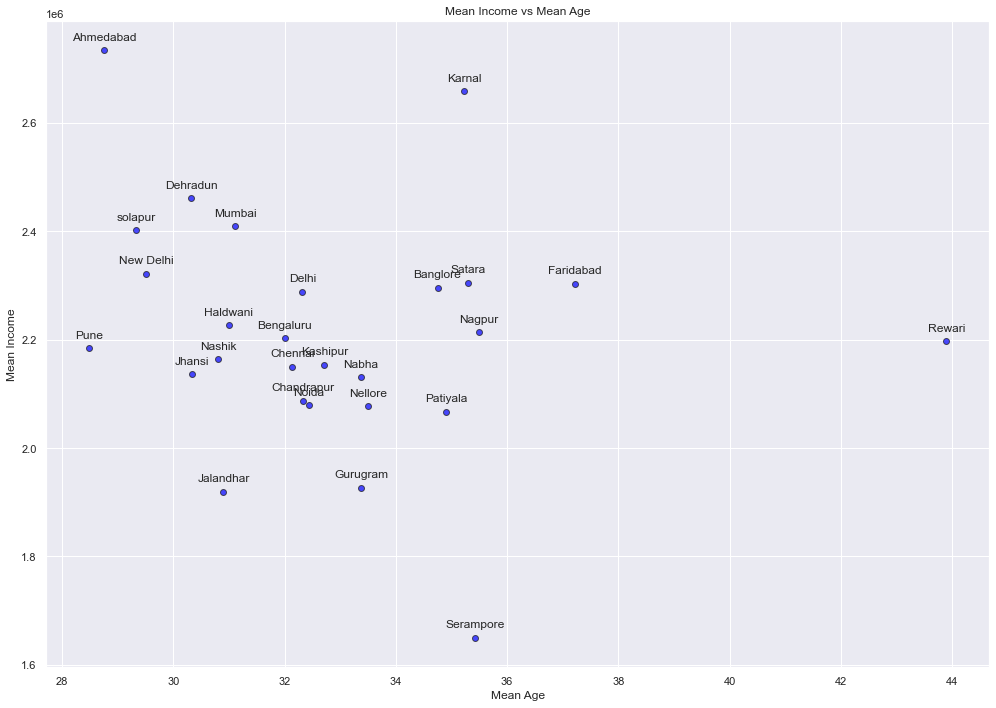

In [10]:
df1 = pd.DataFrame({
    'Age': grouped_age_income,
    'Annual Income': grouped_annualIncome
})
df1.reset_index(inplace=True)
# Plotting
plt.figure(figsize=(14, 10))
plt.scatter(df1['Age'], df1['Annual Income'], c='blue', alpha=0.7, edgecolors='k')

plt.title('Mean Income vs Mean Age')
plt.xlabel('Mean Age')
plt.ylabel('Mean Income')
plt.grid(True)
plt.tight_layout()

# Annotating each point with person's name
for i, person in enumerate(df1['City']):
    plt.annotate(person, (df1['Age'][i], df1['Annual Income'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


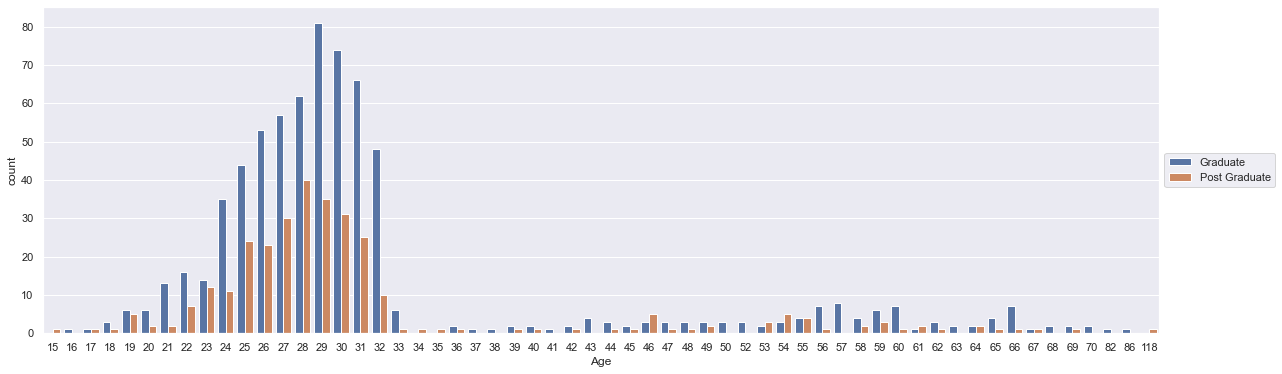

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

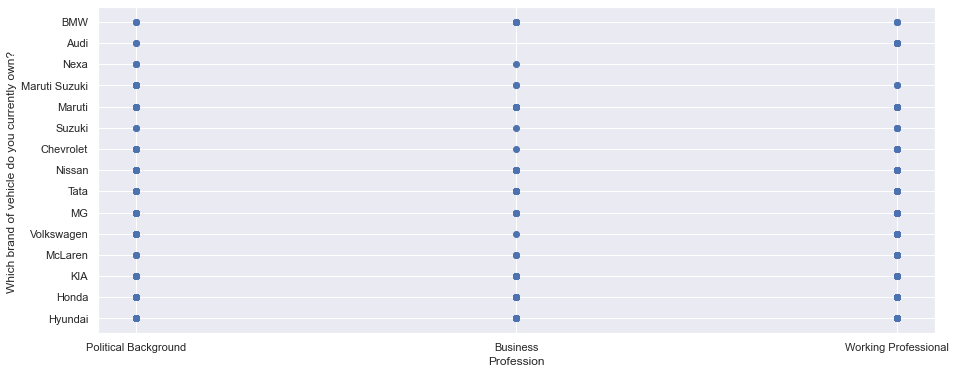

In [12]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])

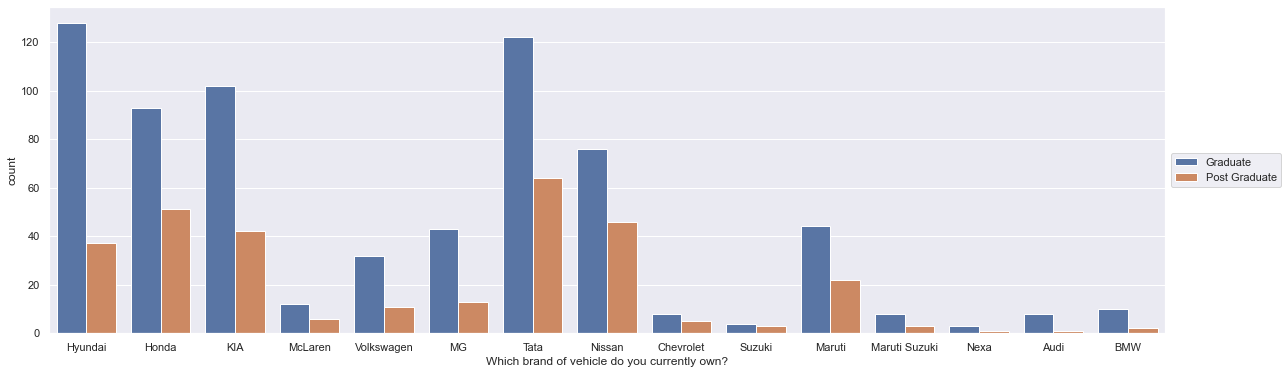

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

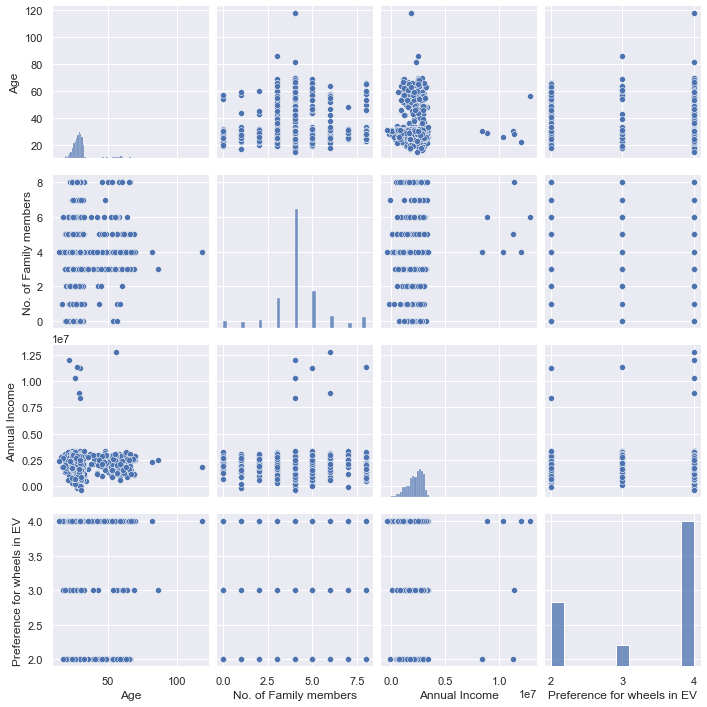

In [14]:
sns.pairplot(df)

In [15]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data,column):
        label_encoder=LabelEncoder()
        label_encoder = label_encoder.fit(data[column])
        return label_encoder.fit_transform(data[column].astype(str))

In [16]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [17]:
df.head()

,Age,City,Profession,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,15,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,5,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,13,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,9,0,0,3,2832379.739,0,1,1,4,6,4,1
4,26,24,1,0,4,2638750.576,2,4,2,9,4,4,2


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
X = df.drop(['City'],axis=1)
y = df['City']

In [20]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
calc_vif(X)

,variables,VIF
0,Age,8.177308
1,Profession,3.876497
2,Education,1.447346
3,No. of Family members,8.184986
4,Annual Income,5.725529
5,Would you prefer replacing all your vehicles t...,4.123506
6,If Yes/Maybe what type of EV would you prefer?,7.093898
7,Do you think Electronic Vehicles are economical?,6.270622
8,Which brand of vehicle do you currently own?,4.156057
9,How much money could you spend on an Electroni...,13.044552


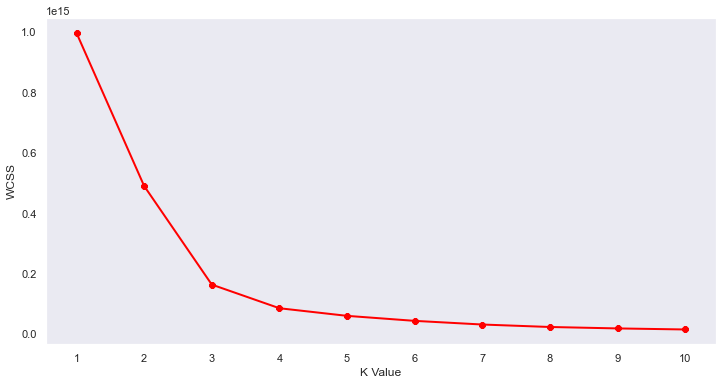

In [22]:
#Kmeans
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

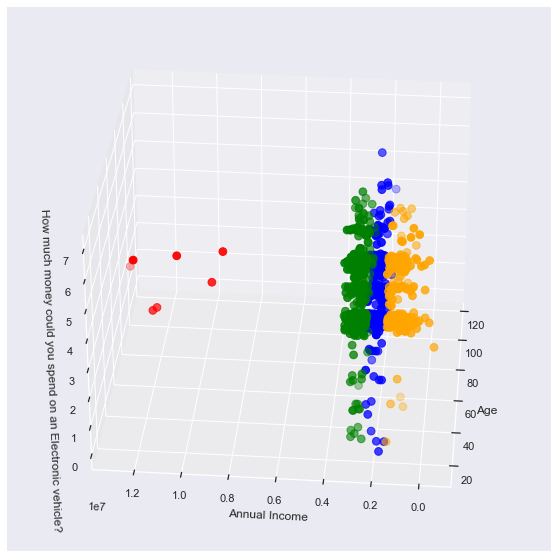

In [23]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income"][df.label == 0], df["How much money could you spend on an Electronic vehicle?"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income"][df.label == 1], df["How much money could you spend on an Electronic vehicle?"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income"][df.label == 2], df["How much money could you spend on an Electronic vehicle?"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income"][df.label == 3], df["How much money could you spend on an Electronic vehicle?"][df.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()